# 🤖 Pima Indians Diabetes 預測分析
本 Notebook 使用 Logistic Regression 模型，預測患者是否罹患糖尿病。資料來自 [Kaggle Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)。

---

模型語言：Python + scikit-learn  


In [1]:
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             classification_report, roc_curve, auc,
                             accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score)

# 讀取資料
url = "https://raw.githubusercontent.com/wjason930/pima-diabetes/main/diabetes.csv"
df = pd.read_csv(url)


# 將不合理的 0 視為缺失值處理
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
df[cols_with_zeros] = df[cols_with_zeros].fillna(df[cols_with_zeros].median())

# 切分資料與標準化
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 建立邏輯回歸模型
log_clf = LogisticRegression(max_iter=1000, class_weight="balanced")
log_clf.fit(X_train_scaled, y_train)

# 預測與機率
y_pred = log_clf.predict(X_test_scaled)
y_prob = log_clf.predict_proba(X_test_scaled)[:, 1]


              precision    recall  f1-score   support

           0      0.824     0.750     0.785       100
           1      0.603     0.704     0.650        54

    accuracy                          0.734       154
   macro avg      0.714     0.727     0.717       154
weighted avg      0.747     0.734     0.738       154



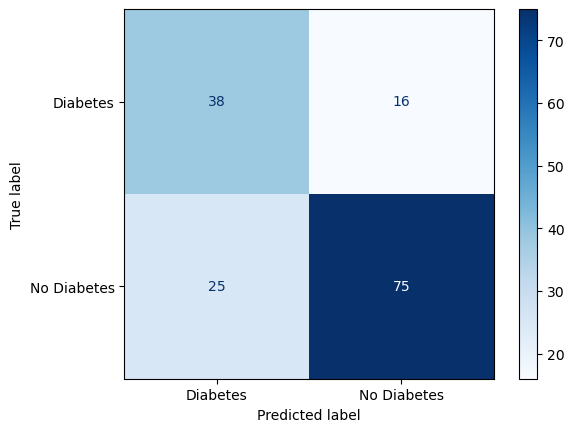

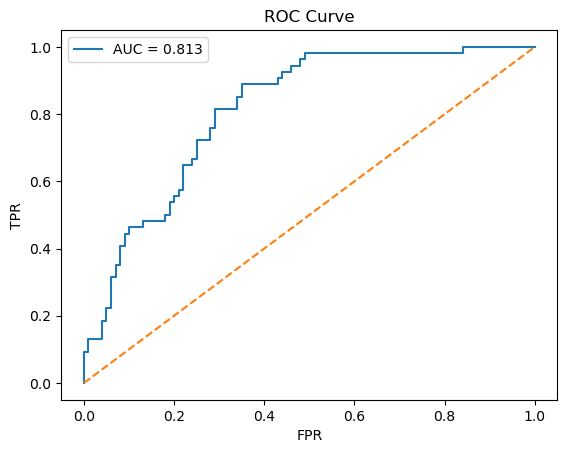

{'accuracy': 0.7337662337662337,
 'precision': 0.6031746031746031,
 'recall': 0.7037037037037037,
 'f1_score': 0.6495726495726495,
 'roc_auc': 0.8125925925925926}

In [2]:
print(classification_report(y_test, y_pred, digits=3))
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Diabetes", "No Diabetes"])
disp.plot(cmap="Blues")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

# 模型評分整理
metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "f1_score": f1_score(y_test, y_pred),
    "roc_auc": roc_auc_score(y_test, y_prob)
}
metrics #顯示評分結果


In [3]:
print("特徵係數：")
for name, coef in zip(X.columns, log_clf.coef_[0]):
    print(f"{name:25s}  {coef: .3f}")


特徵係數：
Pregnancies                 0.373
Glucose                     1.183
BloodPressure              -0.015
SkinThickness               0.014
Insulin                    -0.045
BMI                         0.710
DiabetesPedigreeFunction    0.288
Age                         0.187


## 📊 模型效能評估指標說明

### ✅ Accuracy（準確率）
- 預測正確的比例，但對不平衡資料較不敏感。

### ✅ Precision（精確率）
- 在所有被預測為「有糖尿病」的人中，有多少是真的。

### ✅ Recall（召回率）
- 所有實際有糖尿病的人中，有多少被成功找出來。

### ✅ F1-score
- Precision 和 Recall 的加權平均，是兩者的折衷指標。

### ✅ ROC-AUC
- 衡量模型整體分類能力，值越接近 1 越好。

### ✅ 混淆矩陣
- 詳細顯示預測錯在哪，便於進行錯誤分析。


## ✏️ 可以自行嘗試的改進方向

- 嘗試其他模型：`RandomForest`, `XGBoost`, `SVM`
- 增加特徵交互項或非線性特徵
- 使用 SMOTE 做過採樣處理不平衡
- 調整 decision threshold 以平衡 precision/recall
- 用 k-fold cross validation 評估穩定性
- 改用更精緻的填補方法（如 KNNImputer）

---

> 目前模型的 AUC 約為 **0.81**，表示具有良好的區分能力。未來可透過更多特徵工程與模型優化提升表現。
